In [1]:
import pandas as pd
import numpy as np
from shutil import copy2
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras import models,optimizers,Sequential
from tensorflow.keras.layers import *

In [2]:
os.listdir('../Integrify/Data/data/train')

['cats', 'dogs']

In [3]:
datafiles_name=os.walk('../Integrify/Data/data/train/')

In [4]:
image=imread('../Integrify/Data/data/train/cats/cat.1.jpg')

In [5]:
image.shape

(280, 300, 3)

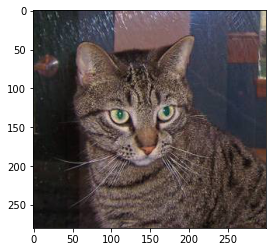

In [6]:
plt.imshow(image)

In [5]:
##training in cnn model

In [7]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = define_model()

In [8]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory('../Integrify/Data/data/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('../Integrify/Data/data/validation/',
    class_mode='binary', batch_size=64, target_size=(200, 200))

# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it),
    validation_data=test_it, validation_steps=len(test_it), epochs=25, verbose=1)

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/25
 2/32 [>.............................] - ETA: 3:08 - loss: 0.7284 - accuracy: 0.4844

KeyboardInterrupt: 

In [29]:
model.save('cat-dog_model.h5')